### Maximisation de la fonction d'utilité sous contrainte :
_F-X. Dehon - dehon[@]unice.fr - 14 avr 2020_

##### Prélude : Gradient, lignes de niveau (ou courbe d'indiférence), ligne de plus grande pente d'une fonction à valeurs dans $\mathbb{R}$.

Soient $f:(x,y)\mapsto f(x,y)$ une fonction à valeurs dans $\mathbb{R}$, $(x_0,y_0)\in\mathbb{R}^2$ et posons $z_0=f(x_0,y_0)$.

Le gradient de $f$ en $(x_0,y_0)$ est le vecteur $(\frac{\partial f}{\partial x}(x_0,y_0),\frac{\partial f}{\partial y}(x_0,y_0))$ ; on le note $\textrm{grad}(f)(x_0,y_0)$.

L'ensemble $f^{-1}(z_0)$ est une ligne (pourvu que le gradient de $f$ soit non nul en chacun des points de $f^{-1}(z_0)$) passant par $(x_0,y_0)$ et orthogonale en $(x_0,y_0)$ au vecteur $\textrm{grad}(f)(x_0,y_0)$.
On l'appelle ligne de niveau de $f$ ("courbe d'indifférence en économie"). Cf la [notice Wikipedia](https://fr.wikipedia.org/wiki/Ligne_de_niveau). On peut les dessiner dans Sagemath avec l'instruction `implicite_plot`

Le vecteur $\textrm{grad}(f)(x_0,y_0)$ pointe en $(x_0,y_0)$ vers la région où $f > z_0$ et le vecteur opposé $-\textrm{grad}(f)(x_0,y_0)$ pointe en $(x_0,y_0)$ vers la région où $f < z_0$.

Les lignes parallèles en tout point au gradiant de $f$ sont appelées lignes de plus grande pente. On peut les paramétrer (pour les dessiner) avec l'instruction `desolve_odeint`

Le graphe de $f$ est l'ensemble des points $(x,y,f(x,y))$ de $\mathbb{R}^3$ ; on peut le dessiner avec l'instruction `plot3d` ou `implicit_plot3d`


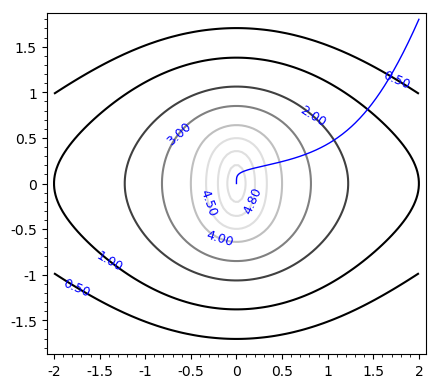

In [1]:
var('x,y');f(x,y)=5-5/(1+x^2+(1/5+x^2+y^2)*y^2)*(x^2+(1/5+x^2+y^2)*y^2)#fonction ad hoc pour l'illustration
sol=desolve_odeint(f.gradient()(x,y).list(),[2,1.8],srange(0,7,0.01),[x,y])
G=line(sol)#ligne de plus grande pente
N=contour_plot(f(x,y),(x,-2,2),(y,-1.8,1.8),contours=[0.5,1,2,3,4,4.5,4.8,4.95],fill=False,labels=True,label_inline=False)#lignes de niveau
show(G+N,aspect_ratio=1)

In [5]:
var('z')
z1,z2=(4.5,1)
xmin,xmax=(-2,3)
ymin,ymax=(-2,2)
zmin,zmax=(0,5.5)
A=line3d([(xmin,0,zmin),(xmax,0,zmin),(xmin,0,zmin)])+line3d([(0,ymin,zmin),(0,ymax,zmin),(0,ymin,0)])+line3d([(0,0,zmin),(0,0,zmax),(0,0,zmin)])#dessin axes
T=text3d('x', (xmax, -.1, zmin-.1))+text3d('y', (-.1, ymax, zmin-.1))+text3d('z', (.1, .1,zmax))#+text3d(str(xmax),(xmax,-.5,-.5))+text3d(str(ymax),(-.5,ymax,-.5))+text3d(str(zmax),(-.5,-.5,zmax))#+text3d('0',(-.5, -.5,-.5))
#I1=implicit_plot3d(z==z1,(x,xmin,xmax),(y,ymin,ymax),(z,zmin,zmax),color='lightblue', opacity=0.5)+text3d('z=4.5',(xmax+.2,ymax+.2,z1))#plan z=z1
#I2=implicit_plot3d(z==z2,(x,xmin,xmax),(y,ymin,ymax),(z,zmin,zmax),color='lightgreen', opacity=0.5)+text3d('z=1',(xmax+.2,ymax+.2,z2))#plan z=z2
L1=implicit_plot(f(x,y)==z1,(x,xmin,xmax),(y,ymin,ymax)).matplotlib().get_children()[1].collections[0].get_paths()[0].to_polygons(closed_only=False)[0]
L1d=line3d([[p[0],p[1],z1] for p in L1],color='black')#+text3d('z='+str(z1.n(digits=1)),(sol[258,0]*1.5,sol[258,1]*1.5,z1))#ligne de niveau f^(-1)(z1)
L2=implicit_plot(f(x,y)==z2,(x,xmin,xmax),(y,ymin,ymax)).matplotlib().get_children()[1].collections[0].get_paths()[0].to_polygons(closed_only=False)[0]
L2d=line3d([[p[0],p[1],z2] for p in L2],color='black')#+text3d('z='+str(z2.n(digits=1)),(sol[206,0]*1.2,sol[206,1]*1.2,z2+.2))#ligne de niveau f^(-1)(z2)
G=line3d([[sol[i,0],sol[i,1],f(*sol[i])] for i in range(700)],color='black')#ligne de plus grande pente partant de (2,1.8,f(2,1.8)) en 3d
#P=plot3d(f,(xmin,xmax),(ymin,ymax),color='orange')
P=implicit_plot3d(z==f(x,y),(x,xmin,xmax),(y,ymin,ymax),(z,zmin,zmax),color='orange', opacity=0.7)#graphe de f

show(P+L1d+L2d+G+A+T,frame=false,aspect_ratio=[1,1,1],viewer='threejs')

Graphics3d Object

##### Calculs et dessins pour la feuille de TD 2 : maximisation de l'utilité

In [6]:
r=20#revenu
c(x,y)=5*x+3*y#coût d'un panier
#b(x,y)=r-(5*x+3*y) #contrainte revenu - prix. Attention : changer r a posteriori ne change pas b(x,y), il faut redéfinir b ou bien définir b(x,y,r)
U(x,y)=(x+2)*(x+3*y) #utilité, expérimenter ensuite U(x,y)=(x+2)*(x+3*y)^2 ou bien U(x,y)=(x+2)*sin(x+3*y)

In [7]:
solve(U(2,y)==40,y)

[y == (8/3)]

In [8]:
var('x,y')
minimize((sin(x)-cos(y))^2,[0,0])

(1.5508703057669242, 0.0)

Dessin (rendu possible par le très petit (2) nombre de biens !) de l'ensemble des paniers admissibles (les $(x,y)$ vérifiant les contraintes $x\geq 0$, $y\geq 0$ et $5x+3y\leq r$) et de la courbe d'indiférence $U=40$

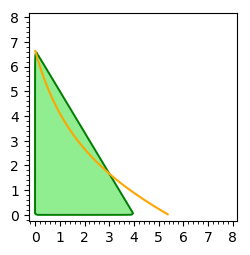

In [9]:
var('x,y')
xmax,ymax=(8,8)
R=region_plot([c(x,y)<=r,x>=0,y>=0],(x,-.1,xmax),(y,-.1,ymax),incol='lightgreen',bordercol='green')#+implicit_plot(U(x,y)==u,(x,0,xmax),(y,0,ymax),color='orange')
L=implicit_plot(U(x,y)==40,(x,0,xmax),(y,0,ymax),color='orange')
show(R+L,aspect_ratio=1,figsize=4)

Graphe de la fonction d'utilité $U$ (dont on cherche le maximum) restreinte aux paniers admissibles

In [ ]:
var('z');r=20;c(x,y)=5*x+3*y;U(x,y)=(x+2)*(x+3*y);u=40
#U(x,y)=(x+2)*(x+3*y);var('z')#expérimenter d'autres valeurs
xmin,xmax=(0,8)
ymin,ymax=(0,8)
zmin,zmax=(0,80)

A=line3d([(xmin,0,0),(xmax,0,0),(xmin,0,0)])+line3d([(0,ymin,0),(0,ymax,0),(0,ymin,0)])+line3d([(0,0,zmin),(0,0,zmax),(0,0,zmin)])#bug avec line3d et threejs
T=text3d('x', (xmax*3/4, -.5, -.5))+text3d('y', (-.5, ymax*3/4, -.5))+text3d('z', (-.5, -.5,zmax*3/4))+text3d(str(xmax),(xmax,-.5,-.5))+text3d(str(ymax),(-.5,ymax,-.5))+text3d(str(zmax),(-.5,-.5,zmax))#+text3d('0',(-.5, -.5,-.5))
B=implicit_plot3d(c==r,(x,0,r/5),(y,0,r/3),(z,0,zmax),color='green', opacity=0.6)#plan c==r en vert
P = implicit_plot3d(z==U(x,y),(x,xmin,xmax),(y,ymin,ymax),(z,zmin,zmax),color='orange', opacity=0.9)#graphe de U en orange
I=implicit_plot3d(z==u,(x,0,xmax),(y,0,ymax),(z,0,zmax),color='lightblue', opacity=0.5)+text3d('z='+str(u),(-.5,-.5,u))#plan z=u en bleu clair

show(I+P+B+A+T,frame=false,aspect_ratio=[1,1,.1],viewer='threejs')#,figsize=4

Approximation numérique du point où $U$ est maximal donnée par la fonction Sagemath `minimize_constrained`.

Attention à la syntaxe pour les définitions de `f`,`c0`,`c1`,`c2` ci-dessous, cf `minimize_constrained?`

In [ ]:
r=20;c(x,y)=5*x+3*y;U(x,y)=(x+2)*(x+3*y);var('z')#expérimenter d'autres valeurs
f=lambda (x,y):-U(x,y)#f atteind son min là où U atteint son max
c0=lambda (x,y):float(r-c(x,y))#c0=lambda (x,y):r-c(x,y) ne donne pas le résultat escompté
c1=lambda (x,y):x
c2=lambda (x,y):y
a=minimize_constrained(f,[c1,c2,c0],(1,2))
print 'a =',a,', b(a) =',c0(a),', U(a) =',U(*a)#comparer avec ce qu'on voit sur le dessin

##### Condition nécessaire pour que $U$ soit maximal en un point intérieur au domaine de définition de $U$ : annulation du gradient de $U$ :

In [ ]:
print U.gradient()
print U.gradient()(x,y).list()

In [ ]:
solve([2*x + 3*y + 2==0,3*x + 6==0],[x,y])

In [ ]:
s=solve([e==0 for e in U.gradient()(x,y).list()],[x,y]);print s
x0,y0=(s[0][0].rhs(),s[0][1].rhs());print (x0,y0)

Dessin :

In [ ]:
xmin,xmax=(-4,8)
ymin,ymax=(-4,8)
zmin,zmax=(-60,80)

A=line3d([(xmin,0,0),(xmax,0,0),(xmin,0,0)])+line3d([(0,ymin,0),(0,ymax,0),(0,ymin,0)])+line3d([(0,0,zmin),(0,0,zmax),(0,0,zmin)])#bug avec line3d et threejs
T=text3d('x', (xmax*5/6, -.5, -.5))+text3d('y', (-.5, ymax*5/6, -.5))+text3d('z', (-.5, -.5,zmax*5/6))+text3d(str(xmax),(xmax,-.5,-.5))+text3d(str(ymax),(-.5,ymax,-.5))+text3d(str(zmax),(-.5,-.5,zmax))

P = implicit_plot3d(z-U(x,y),(x,xmin,xmax),(y,ymin,ymax),(z,zmin,zmax),color='orange', opacity=0.8)
Pt=point3d((x0,y0,U(x0,y0)),size=40,color='black')

show(Pt+P+A+T,frame=false,aspect_ratio=[1,1,.1],viewer='threejs')

$(-2,\frac{2}{3})$ est un point selle ! Ni minimum ni maximum en ce point. Ceci se traduit dans les conditions "du second ordre" : la matrice Hessienne de $U$ en $(-2,\frac{2}{3})$ (la matrice formée des dérivées partielles secondes de $U$) a des valeurs propres de signe opposé. Pour qualifier $(-2,\frac{2}{3})$ comme point où $U$ est maximal il faudrait que ces valeurs propres soient toutes deux négatives.

Par ailleurs le panier $(-2,\frac{2}{3})$ ne vérifie pas les contraintes $x\geq 0, y\geq 0, 5x+3y\leq r$

In [ ]:
M=U.hessian()(x=x0,y=y0)
show(M);show('valeurs propres :',M.eigenvalues())

##### Multiplicateurs de Lagrange

Une contrainte : $c(x,y)\leq r$. Condition nécessaire pour que $U$ soit maximal en un point $(x,y)$ du bord de la région $c(x,y)\leq r$ : $c(x,y)=r$ et $\textrm{grad}\,U(x,y)$ proportionnel à $\textrm{grad}\,c(x,y)$ avec un rapport positif (pourvu que $\textrm{grad}\,c$ soit non nul en les $(x,y)$ vérifiant $c(x,y)=r$).

On résoud $\big( c(x,y)=r\textrm{ et } \textrm{grad}\,U(x,y)=\lambda\,\textrm{grad}\,c(x,y)\big)$ d'inconnues $x,y,\lambda$ avec l'instruction `solve`. Sagemath ne donne pas toujours une solution suivant la complexité de la fonction $U$.

Rq. On peut être un plus restrictif sur $(x,y)$ : la courbe d'indiférence passant par $(x,y)$ doit être tournée vers l'extérieur de la région $c(x,y)\leq r$. Caractérisation avec la matrice hessienne de $U$ ?

In [ ]:
print c.gradient()

In [ ]:
var('l');r=20
L=(U-l*c).gradient()(x,y)
solve([L[0]==0,L[1]==0,c==r],[x,y,l])

On choisit maintenant r=7. Qu'observe t-on ?

In [ ]:
r=7
L=(U-l*c).gradient()(x,y)
solve([L[0]==0,L[1]==0,c==r],[x,y,l])

In [ ]:
var('r')#solution en fonction de r
L=(U-l*c).gradient()(x,y)
solve([L[0]==0,L[1]==0,c==r],[x,y,l])

Deux contraintes : $c(x,y)\leq r$ et $x\geq 0$ qu'on réécrit $c_1(x,y):=-x\leq 0$.
Condition nécessaire pour que $U$ soit maximal en un point $(x,y)$ au coin de la région $\{c(x,y)\leq r,\ -x\leq 0\}$ : $c(x,y)=r$ et $x=0$ et $\textrm{grad}\,U(x,y)$ combinaison linéaire à coefficients positifs de $\textrm{grad}\,c(x,y)$ et de $\textrm{grad}\,((x,y)\mapsto -x)$.

On résoud $\big( c(x,y)=r\textrm{ et }c_1(x,y)=0\textrm{ et } \textrm{grad}\,U(x,y)=\lambda\,\textrm{grad}\,c(x,y)+\mu\,\textrm{grad}\,c_1(x,y)\big)$ d'inconnues $x,y,\lambda,\mu$ avec l'instruction `solve`.

In [ ]:
var('l,m')
c1(x,y)=-x
r=7
L=(U-l*c-m*c1).gradient()(x,y)
print solve([L[0]==0,L[1]==0,c==r,c1==0],[x,y,l,m])

In [ ]:
r=20
L=(U-l*c-m*c1).gradient()(x,y)
print solve([L[0]==0,L[1]==0,c==r,c1==0],[x,y,l,m])

Contraintes $x\geq 0$ et $y\geq 0$ ; test en le coin $x=y=0$. Est il qualifié ?

In [ ]:
c2(x,y)=-y
L=(U-l*c1-m*c2).gradient()(x,y)
print solve([L[0]==0,L[1]==0,c1==0,c2==0],[x,y,l,m])

##### Conditions suffisantes :

1. Sous les hypothèses (vérifiées ici) que $U$ est continue et que la région délimitée par les contraintes est bornée, on sait que $U$ atteint son maximum.
Si on obtient un nombre fini de points $(x,y)$ qualifiés pour que $U$ y atteigne son maximum, il suffit de comparer les valeurs prises par $U$ en ces points.
Rq : on obtient au moins deux tels points ; pourquoi ?

2. Si $U$ est convexe (caractérisation par la matrice hessienne en tout point) et les contraintes sont affines, alors $U$ atteint son max en un coin du domaine.
Il suffit de déterminer la liste de ces coins et de comparer les valeurs de $U$ en ces coins.